In [1]:
import scanpy as sc
import scirpy as ir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
import sys
sys.path.append('../')
import tcr_embedding as tcr

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
adata = sc.read_h5ad('../data/10x_CD8TC/highly_var_5000.h5ad')
adata

AnnData object with n_obs × n_vars = 178356 × 19707
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'barcode', 'donor', 'cell_clono_cdr3_aa', 'cell_clono_cdr3_nt', 'CD3', 'CD19', 'CD45RA', 'CD4', 'CD8a', 'CD14', 'CD45RO', 'CD279_PD-1', 'IgG1', 'IgG2a', 'IgG2

In [5]:
pd.set_option('display.max_columns', None)
adata.obs.head()

,IR_VJ_1_locus,IR_VJ_2_locus,IR_VDJ_1_locus,IR_VDJ_2_locus,IR_VJ_1_cdr3,IR_VJ_2_cdr3,IR_VDJ_1_cdr3,IR_VDJ_2_cdr3,IR_VJ_1_cdr3_nt,IR_VJ_2_cdr3_nt,IR_VDJ_1_cdr3_nt,IR_VDJ_2_cdr3_nt,IR_VJ_1_expr,IR_VJ_2_expr,IR_VDJ_1_expr,IR_VDJ_2_expr,IR_VJ_1_expr_raw,IR_VJ_2_expr_raw,IR_VDJ_1_expr_raw,IR_VDJ_2_expr_raw,IR_VJ_1_v_gene,IR_VJ_2_v_gene,IR_VDJ_1_v_gene,IR_VDJ_2_v_gene,IR_VJ_1_d_gene,IR_VJ_2_d_gene,IR_VDJ_1_d_gene,IR_VDJ_2_d_gene,IR_VJ_1_j_gene,IR_VJ_2_j_gene,IR_VDJ_1_j_gene,IR_VDJ_2_j_gene,IR_VJ_1_c_gene,IR_VJ_2_c_gene,IR_VDJ_1_c_gene,IR_VDJ_2_c_gene,IR_VJ_1_junction_ins,IR_VJ_2_junction_ins,IR_VDJ_1_junction_ins,IR_VDJ_2_junction_ins,has_ir,multi_chain,barcode,donor,cell_clono_cdr3_aa,cell_clono_cdr3_nt,CD3,CD19,CD45RA,CD4,CD8a,CD14,CD45RO,CD279_PD-1,IgG1,IgG2a,IgG2b,CD127,CD197_CCR7,HLA-DR,A0101_VTEHDTLLY_IE-1_CMV,A0201_KTWGQYWQV_gp100_Cancer,A0201_ELAGIGILTV_MART-1_Cancer,A0201_CLLWSFQTSA_Tyrosinase_Cancer,A0201_IMDQVPFSV_gp100_Cancer,A0201_SLLMWITQV_NY-ESO-1_Cancer,A0201_KVAELVHFL_MAGE-A3_Cancer,A0201_KVLEYVIKV_MAGE-A1_Cancer,A0201_CLLGTYTQDV_Kanamycin-B-dioxygenase,A0201_LLDFVRFMGV_EBNA-3B_EBV,A0201_LLMGTLGIVC_HPV-16E7_82-91,A0201_CLGGLLTMV_LMP-2A_EBV,A0201_YLLEMLWRL_LMP1_EBV,A0201_FLYALALLL_LMP2A_EBV,A0201_GILGFVFTL_Flu-MP_Influenza,A0201_GLCTLVAML_BMLF1_EBV,A0201_NLVPMVATV_pp65_CMV,A0201_ILKEPVHGV_RT_HIV,A0201_FLASKIGRLV_Ca2-indepen-Plip-A2,A2402_CYTWNQMNL_WT1-(235-243)236M_Y,A0201_RTLNAWVKV_Gag-protein_HIV,A0201_KLQCVDLHV_PSA146-154,A0201_LLFGYPVYV_HTLV-1,A0201_SLFNTVATL_Gag-protein_HIV,A0201_SLYNTVATLY_Gag-protein_HIV,A0201_SLFNTVATLY_Gag-protein_HIV,A0201_RMFPNAPYL_WT-1,A0201_YLNDHLEPWI_BCL-X_Cancer,A0201_MLDLQPETT_16E7_HPV,A0301_KLGGALQAK_IE-1_CMV,A0301_RLRAEAQVK_EMNA-3A_EBV,A0301_RIAAWMATY_BCL-2L1_Cancer,A1101_IVTDFSVIK_EBNA-3B_EBV,A1101_AVFDRKSDAK_EBNA-3B_EBV,B3501_IPSINVHHY_pp65_CMV,A2402_AYAQKIFKI_IE-1_CMV,A2402_QYDPVAALF_pp65_CMV,B0702_QPRAPIRPI_EBNA-6_EBV,B0702_TPRVTGGGAM_pp65_CMV,B0702_RPPIFIRRL_EBNA-3A_EBV,B0702_RPHERNGFTVL_pp65_CMV,B0801_RAKFKQLL_BZLF1_EBV,B0801_ELRRKMMYM_IE-1_CMV,B0801_FLRGRAYGL_EBNA-3A_EBV,A0101_SLEGGGLGY_NC,A0101_STEGGGLAY_NC,A0201_ALIAPVHAV_NC,A2402_AYSSAGASI_NC,B0702_GPAESAAGL_NC,NR(B0801)_AAKGRGAAL_NC,A0101_VTEHDTLLY_IE-1_CMV_binder,A0201_KTWGQYWQV_gp100_Cancer_binder,A0201_ELAGIGILTV_MART-1_Cancer_binder,A0201_CLLWSFQTSA_Tyrosinase_Cancer_binder,A0201_IMDQVPFSV_gp100_Cancer_binder,A0201_SLLMWITQV_NY-ESO-1_Cancer_binder,A0201_KVAELVHFL_MAGE-A3_Cancer_binder,A0201_KVLEYVIKV_MAGE-A1_Cancer_binder,A0201_CLLGTYTQDV_Kanamycin-B-dioxygenase_binder,A0201_LLDFVRFMGV_EBNA-3B_EBV_binder,A0201_LLMGTLGIVC_HPV-16E7_82-91_binder,A0201_CLGGLLTMV_LMP-2A_EBV_binder,A0201_YLLEMLWRL_LMP1_EBV_binder,A0201_FLYALALLL_LMP2A_EBV_binder,A0201_GILGFVFTL_Flu-MP_Influenza_binder,A0201_GLCTLVAML_BMLF1_EBV_binder,A0201_NLVPMVATV_pp65_CMV_binder,A0201_ILKEPVHGV_RT_HIV_binder,A0201_FLASKIGRLV_Ca2-indepen-Plip-A2_binder,A2402_CYTWNQMNL_WT1-(235-243)236M_Y_binder,A0201_RTLNAWVKV_Gag-protein_HIV_binder,A0201_KLQCVDLHV_PSA146-154_binder,A0201_LLFGYPVYV_HTLV-1_binder,A0201_SLFNTVATL_Gag-protein_HIV_binder,A0201_SLYNTVATLY_Gag-protein_HIV_binder,A0201_SLFNTVATLY_Gag-protein_HIV_binder,A0201_RMFPNAPYL_WT-1_binder,A0201_YLNDHLEPWI_BCL-X_Cancer_binder,A0201_MLDLQPETT_16E7_HPV_binder,A0301_KLGGALQAK_IE-1_CMV_binder,A0301_RLRAEAQVK_EMNA-3A_EBV_binder,A0301_RIAAWMATY_BCL-2L1_Cancer_binder,A1101_IVTDFSVIK_EBNA-3B_EBV_binder,A1101_AVFDRKSDAK_EBNA-3B_EBV_binder,B3501_IPSINVHHY_pp65_CMV_binder,A2402_AYAQKIFKI_IE-1_CMV_binder,A2402_QYDPVAALF_pp65_CMV_binder,B0702_QPRAPIRPI_EBNA-6_EBV_binder,B0702_TPRVTGGGAM_pp65_CMV_binder,B0702_RPPIFIRRL_EBNA-3A_EBV_binder,B0702_RPHERNGFTVL_pp65_CMV_binder,B0801_RAKFKQLL_BZLF1_EBV_binder,B0801_ELRRKMMYM_IE-1_CMV_binder,B0801_FLRGRAYGL_EBNA-3A_EBV_binder,A0101_SLEGGGLGY_NC_binder,A0101_STEGGGLAY_NC_binder,A0201_ALIAPVHAV_NC_binder,A2402_AYSSAGASI_NC_binder,B0702_GPAESAAGL_NC_binder,NR(B0801)_AAKGRGAAL_NC_binder,n_counts,log_counts,n_genes,mt_fraction,doublet_score,doublet,louvain
AAACGGGAGAAGATTC-1-donor_

## Preprocessing

### Filter out non-highly variable genes

In [6]:
print('Shape before: ', adata.shape)
adata = adata[:, adata.var['highly_variable']]
print('Shape after: ', adata.shape)

Shape before:  (178356, 19707)


C:\Users\yanga\AppData\Local\Continuum\anaconda3\envs\tcr\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Shape after:  (178356, 5000)


### TCR Cleaning
Clean cells without chains, multichain and orphaned cells, only use first IR in dual IR

Remove cells without chains

In [7]:
print('Number of cells without TCR: ', (adata.obs['has_ir'] == 'False').sum())

Number of cells without TCR:  26207


In [8]:
print('Shape before: ', adata.shape)
adata = adata[adata.obs['has_ir'] == 'True']
print('Shape after: ', adata.shape)

Shape before:  (178356, 5000)
Shape after:  (152149, 5000)


#### Remove multichains

In [9]:
print('Number of multichains: ', (adata.obs['multi_chain'] == 'True').sum())

Number of multichains:  147


In [10]:
print('Shape before: ', adata.shape)
adata = adata[adata.obs['multi_chain'] == 'False']
print('Shape after: ', adata.shape)

Shape before:  (152149, 5000)
Shape after:  (152002, 5000)


#### Remove orphaned chains

NaN means no chain detected

None means TRA or TRB not detected, but the other is present

In [11]:
print('Number of NaNs in TRA: ', (adata.obs['IR_VJ_1_cdr3'] == 'nan').sum())
print('Number of None in TRA: ', (adata.obs['IR_VJ_1_cdr3'] == 'None').sum())

print('Number of NaNs in TRB: ', (adata.obs['IR_VDJ_1_cdr3'] == 'nan').sum())
print('Number of None in TRB: ', (adata.obs['IR_VDJ_1_cdr3'] == 'None').sum())

Number of NaNs in TRA:  0
Number of None in TRA:  19379
Number of NaNs in TRB:  0
Number of None in TRB:  4036


In [12]:
print('Shape before: ', adata.shape)
adata = adata[(adata.obs['IR_VJ_1_cdr3'] != 'None') & (adata.obs['IR_VJ_1_cdr3'] != 'nan') & 
              (adata.obs['IR_VDJ_1_cdr3'] != 'None') & (adata.obs['IR_VDJ_1_cdr3'] != 'nan')]
print('Shape after: ', adata.shape)

Shape before:  (152002, 5000)
Shape after:  (128587, 5000)


In [13]:
print('Number of NaNs in TRA: ', (adata.obs['IR_VJ_1_cdr3'] == 'nan').sum())
print('Number of None in TRA: ', (adata.obs['IR_VJ_1_cdr3'] == 'None').sum())

print('Number of NaNs in TRB: ', (adata.obs['IR_VDJ_1_cdr3'] == 'nan').sum())
print('Number of None in TRB: ', (adata.obs['IR_VDJ_1_cdr3'] == 'None').sum())

Number of NaNs in TRA:  0
Number of None in TRA:  0
Number of NaNs in TRB:  0
Number of None in TRB:  0


### Define Clonotypes

#### Use predefined clonotypes by 10x
Clonotypes are already defined by 10x based on the "unique set of recombined TCR nucleotide sequence" [10x_2019].

BUT: They use multiple chains to determine clonotypes

In [14]:
clono_dict = []
for donor_id in range(1,5):
    clono_dict.append(pd.read_csv(f'../data/10x_CD8TC/patient_{donor_id}/vdj_v1_hs_aggregated_donor{donor_id}_clonotypes.csv'))
clono_dict = pd.concat(clono_dict, ignore_index=True)
clono_dict = {aa: clono_id for clono_id, aa in enumerate(clono_dict['cdr3s_aa'].unique())}
clono_dict

{'TRA:CAGHTGNQFYF;TRB:CASSWGGGSHYGYTF': 0,
 'TRA:CAARVRGFGNVLHC;TRA:CAVGDNFNKFYF;TRB:CASSLYSATGELFF': 1,
 'TRB:CASSWGGGSHYGYTF': 2,
 'TRA:CAVSAASGGSYIPTF;TRB:CASSPRDRERGEQYF': 3,
 'TRA:CAMNPAWGGATNKLIF;TRB:CSASPGDYEQYF': 4,
 'TRA:CAVHGYGQNFVF;TRB:CASSQEWLAVSTDTQYF': 5,
 'TRA:CAASGYDYKLSF;TRA:CAVFLYGNNRLAF;TRB:CSVSASGGDEQYF': 6,
 'TRA:CAREHMDSNYQLIW;TRB:CASSQLGRGDNEQFF': 7,
 'TRA:CAEGGNTGKLIF;TRB:CASSPGGLAGADTQYF': 8,
 'TRA:CALKLIKAAGNKLTF;TRB:CAWTGTGKIGWDSPLHF': 9,
 'TRA:CAVDFRDNYGQNFVF;TRB:CASSLSSGTYEQYF': 10,
 'TRA:CAVGDNFNKFYF;TRB:CASSLYSATGELFF': 11,
 'TRA:CAVDPMDTGRRALTF;TRB:CASSLGFTDTQYF': 12,
 'TRA:CATEGASGGSYIPTF;TRB:CAWVLGPAGDTQYF': 13,
 'TRA:CAVRSSGGSYIPTF;TRB:CATSTGDSNQPQHF': 14,
 'TRA:CAESKNNNARLMF;TRB:CASSLSGYEQYF': 15,
 'TRA:CAARVRGFGNVLHC;TRB:CASSLYSATGELFF': 16,
 'TRA:CAASSAGAGSYQLTF;TRB:CASSLFGGTYEQYF': 17,
 'TRA:CAASVSIWTGTASKLTF;TRA:CAAWDMEYGNKLVF;TRB:CAISDPGLAGGGGEQFF': 18,
 'TRA:CAVTDGGSQGNLIF;TRB:CASSIRSSYEQYF': 19,
 'TRA:CALGDSGAGSYQLTF;TRB:CASREIQGSGANVLTF': 20,

In [15]:
print('Number of clonotypes: ', len(clono_dict))

Number of clonotypes:  83803


In [16]:
print('Number of cells without assigned clonotype', adata.obs['cell_clono_cdr3_aa'].map(clono_dict).isna().sum())
adata.obs['clonotype_10x'] = adata.obs['cell_clono_cdr3_aa'].map(clono_dict)

Number of cells without assigned clonotype 0


Trying to set attribute `.obs` of view, copying.


In [17]:
adata.obs['clonotype_10x'].head()

AAACGGGAGAAGATTC-1-donor_1      198
AAACGGGTCGGACAAG-1-donor_1        7
AAAGATGGTACAGACG-1-donor_1    20468
AAAGTAGAGACGCTTT-1-donor_1     6787
AAAGTAGAGCGCTTAT-1-donor_1     6780
Name: clonotype_10x, dtype: category
Categories (52476, int64): [43455, 83039, 23785, 69398, ..., 2027, 39836, 42116, 33079]

<span style="color:red">The 10x definition is problematic. It is based on uniqueness of all sequences of a cell (multichain), therefore there are many identical clones on a single IR level </span>.
See below for proof:

In [18]:
# Clusters are based on uniqueness of ALL aa chains, 
# not only the first IR, as our preprocessing
print('All counts between 10x clonotypes and all! chains are overlapping: ', (adata.obs['clonotype_10x'].value_counts().values == adata.obs['cell_clono_cdr3_aa'].value_counts().values).all())

All counts between 10x clonotypes and all! chains are overlapping:  True


In [19]:
# Identical with 10x defined clonotypes, just better readable names here
adata.obs['cell_clono_cdr3_aa'].value_counts()

TRA:CAASETSYDKVIF;TRB:CASSFSGNTGELFF                    5294
TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF                 3794
TRA:CADSGGGADGLTF;TRB:CASSLRDGSEAFF                     3791
TRA:CAIGPGNMLTF;TRB:CSVDLEANYGYTF                       2930
TRA:CAGHTGNQFYF;TRB:CASSWGGGSHYGYTF                     2187
                                                        ... 
TRA:CALSEDSNSGYALNF;TRB:CASTGHTNTDTQYF                     1
TRA:CALSEDSNYQLIW;TRB:CASSIQGHYEQYF                        1
TRA:CALSEDSNYQLIW;TRB:CASSSRTGEERDTQYF                     1
TRA:CALSEDSNYQLIW;TRB:CASSWSNYGYTF                         1
TRA:CYSTWRLSCLLLCRRPLKGGSYIPTF;TRB:CASSSTGGGEKDQPQHF       1
Name: cell_clono_cdr3_aa, Length: 52476, dtype: int64

In [20]:
# Defined clonotypes are different from clonotypes based only on single IRs
(adata.obs['IR_VJ_1_cdr3'].astype(str) + '+' + adata.obs['IR_VDJ_1_cdr3'].astype(str)).value_counts()

CAASETSYDKVIF+CASSFSGNTGELFF       5333
CAVDLMKTSYDKVIF+CASRTGLASTDTQYF    3837
CADSGGGADGLTF+CASSLRDGSEAFF        3826
CAIGPGNMLTF+CSVDLEANYGYTF          2977
CAGHTGNQFYF+CASSWGGGSHYGYTF        2210
                                   ... 
CAASKWGDDMRF+CASSSLAGGSYNEQFF         1
CALSDLASGTYKYIF+CASSGESSYEQYF         1
CVPMDSNYQLIW+CASRGLAGSSYEQYF          1
CAMRSMDSSYKLIF+CASISGLDTQYF           1
CAASGGQFYF+CASSGPRGSSYNEQFF           1
Length: 51213, dtype: int64

In [21]:
# An example, where multichains are in different clonotypes
[seq for seq in adata.obs['cell_clono_cdr3_aa'].unique() if 'TRA:CAASETSYDKVIF' in seq and 'TRB:CASSFSGNTGELFF' in seq]

['TRA:CAASETSYDKVIF;TRA:CAGHTGNQFYF;TRB:CASSFSGNTGELFF',
 'TRA:CGTDSNDYKLSF;TRA:CAASETSYDKVIF;TRB:CARQPLRGANVLTF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRA:CAGHTGNQFYF;TRB:CASSWGGGSHYGYTF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRA:CALSVRSGGGADGLTF;TRB:CASSSRGQGGYEQYF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRA:CASIAGTYKYIF;TRB:CASSVVSGANVLTF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRB:CASSFSGNTGELFF;TRB:CASSIRSSYEQYF',
 'TRA:CAASETSYDKVIF;TRA:CAVRDRTGGFKTIF;TRB:CSVEDRRPDEQFF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRB:CASSLQGGTGELFF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRA:CALPQLIQGAQKLVF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRB:CASSLMRGGTYNSPLHF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRB:CASSFSGNTGELFF;TRB:CASSIDQGQSEEGNQPQHF',
 'TRA:CAESLWDDKIIF;TRA:CAASETSYDKVIF;TRB:CASSQTRGAGNTIYF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRA:CAVRLNSGYALNF;TRB:CASSFSGNTGELFF',
 'TRA:CAASETSYDKVIF;TRB:CASSLRDGSEAFF;TRB:CASSFSGNTGELFF',
 'TRA:C

#### Alternative method to get clonotypes based on uniqueness of single IRs (TRA+TRB)

In [22]:
adata.obs['TRA+TRB'] = adata.obs['IR_VJ_1_cdr3'].astype(str) + '+' + adata.obs['IR_VDJ_1_cdr3'].astype(str)
adata.obs['TRA+TRB'].head()

AAACGGGAGAAGATTC-1-donor_1       CAMREGSNDMRF+CASSIKGPFRTEAFF
AAACGGGTCGGACAAG-1-donor_1     CAREHMDSNYQLIW+CASSQLGRGDNEQFF
AAAGATGGTACAGACG-1-donor_1     CAALYNFNKFYF+CSARGLTADKDNYEQYF
AAAGTAGAGACGCTTT-1-donor_1    CAVIVWGNNRLAF+CASSLDRRLAGQETQYF
AAAGTAGAGCGCTTAT-1-donor_1       CAGDPDAGNNRKLIW+CAISEATDTQYF
Name: TRA+TRB, dtype: object

In [23]:
clono_dict = {clone: idx for idx, clone in enumerate(adata.obs['TRA+TRB'].unique())}
clono_dict

{'CAMREGSNDMRF+CASSIKGPFRTEAFF': 0,
 'CAREHMDSNYQLIW+CASSQLGRGDNEQFF': 1,
 'CAALYNFNKFYF+CSARGLTADKDNYEQYF': 2,
 'CAVIVWGNNRLAF+CASSLDRRLAGQETQYF': 3,
 'CAGDPDAGNNRKLIW+CAISEATDTQYF': 4,
 'CAESMDNYGQNFVF+CASSLSVTTDTQYF': 5,
 'CAEIPNYGGSQGNLIF+CASSNTLAGVPLNEQFF': 6,
 'CAVKKGGGNKLTF+CASSQEGQGTDTQYF': 7,
 'CAVDSSYKLIF+CASSVREMVDTQYF': 8,
 'CAASEGLGAGGTSYGKLTF+CASRGDRSFRDTQYF': 9,
 'CAGHTGNQFYF+CASSWGGGSHYGYTF': 10,
 'CAVTGDDYKLSF+CASSQDTTTATYEQYF': 11,
 'CAVRAYRMDFGNEKLTF+CASTPGTSGTYEQYF': 12,
 'CATEGASGGSYIPTF+CAWVLGPAGDTQYF': 13,
 'CASRQSGGSYIPTF+CASSLAGPAADRPYNEQFF': 14,
 'CAGSNFGNEKLTF+CASSGLSSSYEQYF': 15,
 'CAANRDAGNMLTF+CASAENSNQPQHF': 16,
 'CAFTGANNLFF+CASSLGNRIVVGNTEAFF': 17,
 'CALSEAYAGGTSYGKLTF+CASRTGNLNTEAFF': 18,
 'CASAGGGNKLTF+CASSQRHNEQFF': 19,
 'CASRYNQGGKLIF+CASSILQGIEDTQYF': 20,
 'CAVRSSGGSYIPTF+CATSTGDSNQPQHF': 21,
 'CAVFTGGYQKVTF+CATSRGGGFDILFRNGHTF': 22,
 'CAGAVGSSNTGKLIF+CASSIRSAYEQYF': 23,
 'CAEGGNTGKLIF+CASSPGGLAGADTQYF': 24,
 'CILRPYSSASKIIF+CASSPVSQGANSGNTIYF': 25

In [24]:
adata.obs['clonotype'] = adata.obs['TRA+TRB'].map(clono_dict)
adata.obs['clonotype'].head()

AAACGGGAGAAGATTC-1-donor_1    0
AAACGGGTCGGACAAG-1-donor_1    1
AAAGATGGTACAGACG-1-donor_1    2
AAAGTAGAGACGCTTT-1-donor_1    3
AAAGTAGAGCGCTTAT-1-donor_1    4
Name: clonotype, dtype: int64

In [25]:
adata.obs['clonotype'].value_counts()

18840    5333
41053    3837
2210     3826
28859    2977
10       2210
         ... 
32473       1
26330       1
28379       1
22236       1
14297       1
Name: clonotype, Length: 51213, dtype: int64

### Represent aa chains as label sequence and/or one-hot encoding
This is not feasible, as annData.write converts the columns to categorical, so they are not usable anymore

In [26]:
adata.obs['TRA+TRB'] = adata.obs['IR_VJ_1_cdr3'].astype(str) + '+' + adata.obs['IR_VDJ_1_cdr3'].astype(str)

sanity check if data only contains the correct aa tokens

In [27]:
aa_tokens = adata.obs['TRA+TRB'].apply(lambda x: list(x))
unique_aa_tokens = sorted(set([x for sublist in aa_tokens for x in sublist]))
unique_aa_tokens

['+',
 'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

Get maximum sequence length as pad value

In [28]:
pad = adata.obs['TRA+TRB'].str.len().max()
pad = int(pad)
pad

45

encode amino acids to unique id, '_' is pad character, '<' start and '>' end symbol '+' is the separation between TRA and TRB

In [29]:
aa_to_id = {'_': 0, 'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13,
            'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20, '+': 21, '<': 22, '>': 23}

In [30]:
# The method returns aa_to_id, but we don't need it here, so we put _. Only needed if the method should determine aa_to_id by itself
tcr.utils.aa_encoding(adata, read_col='TRA+TRB', ohe_col='one_hot', label_col='tcr_seq', length_col='seq_len', pad=pad, aa_to_id=aa_to_id, start_end_symbol=True)
adata.obs[['TRA+TRB', 'tcr_seq', 'one_hot', 'seq_len']]

,TRA+TRB,tcr_seq,one_hot,seq_len
AAACGGGAGAAGATTC-1-donor_1,<CAMREGSNDMRF+CASSIKGPFRTEAFF>,"[22, 2, 1, 11, 15, 4, 6, 16, 12, 3, 11, 15, 5,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",30
AAACGGGTCGGACAAG-1-donor_1,<CAREHMDSNYQLIW+CASSQLGRGDNEQFF>,"[22, 2, 1, 15, 4, 7, 11, 3, 16, 12, 20, 14, 10...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32
AAAGATGGTACAGACG-1-donor_1,<CAALYNFNKFYF+CSARGLTADKDNYEQYF>,"[22, 2, 1, 1, 10, 20, 12, 5, 12, 9, 5, 20, 5, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",32
AAAGTAGAGACGCTTT-1-donor_1,<CAVIVWGNNRLAF+CASSLDRRLAGQETQYF>,"[22, 2, 1, 18, 8, 18, 19, 6, 12, 12, 15, 10, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",33
AAAGTAGAGCGCTTAT-1-donor_1,<CAGDPDAGNNRKLIW+CAISEATDTQYF>,"[22, 2, 1, 6, 3, 13, 3, 1, 6, 12, 12, 15, 9, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",30
...,...,...,...,...
TTTGTCAGTACCCAAT-8-donor_4,<CIVDTGANSKLTF+CASSESLDEKLFF>,"[22, 2, 8, 18, 3, 17, 6, 1, 12, 16, 9, 10, 17,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",29
TTTGTCAGTCTAAACC-8-donor_4,<CAMRGLEGGGNKLTF+CASSQDRGFGETQYF>,"[22, 2, 1, 11, 15, 6, 10, 4, 6, 6, 6, 12, 9, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",33
TTTGTCAGTCTCTCGT-8-donor_4,<CILRDGKGGGSQGNLIF+CASSSREPRELFF>,"[22, 2, 8, 10, 15, 3, 6, 9, 6, 6, 6, 16, 14, 6...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",33
TTTGTCATCCCACTTG-8-donor_4,<CAVRDLMDTGRRALTF+CSATGQETQYF>,"[22, 2, 1, 18, 15, 3, 10, 11, 3, 17, 6, 15, 15...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",30


In [31]:
adata.obsm['tcr_seq'].shape

(128587, 47)

In [32]:
adata.obsm['one_hot'].shape

(128587, 47, 24)

In [33]:
adata.uns['aa_to_id']

{'_': 0,
 'A': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20,
 '+': 21,
 '<': 22,
 '>': 23}

### Antigen Binding Preprocessing

In [34]:
# antigen binding list
antigen_binding_list = ['A0101_VTEHDTLLY_IE-1_CMV_binder', 
                        'A0201_KTWGQYWQV_gp100_Cancer_binder', 
                        'A0201_ELAGIGILTV_MART-1_Cancer_binder', 
                        'A0201_CLLWSFQTSA_Tyrosinase_Cancer_binder', 
                        'A0201_IMDQVPFSV_gp100_Cancer_binder', 
                        'A0201_SLLMWITQV_NY-ESO-1_Cancer_binder', 
                        'A0201_KVAELVHFL_MAGE-A3_Cancer_binder', 
                        'A0201_KVLEYVIKV_MAGE-A1_Cancer_binder', 
                        'A0201_CLLGTYTQDV_Kanamycin-B-dioxygenase_binder', 
                        'A0201_LLDFVRFMGV_EBNA-3B_EBV_binder', 
                        'A0201_LLMGTLGIVC_HPV-16E7_82-91_binder', 
                        'A0201_CLGGLLTMV_LMP-2A_EBV_binder', 
                        'A0201_YLLEMLWRL_LMP1_EBV_binder', 
                        'A0201_FLYALALLL_LMP2A_EBV_binder', 
                        'A0201_GILGFVFTL_Flu-MP_Influenza_binder', 
                        'A0201_GLCTLVAML_BMLF1_EBV_binder', 
                        'A0201_NLVPMVATV_pp65_CMV_binder', 
                        'A0201_ILKEPVHGV_RT_HIV_binder', 
                        'A0201_FLASKIGRLV_Ca2-indepen-Plip-A2_binder', 
                        'A2402_CYTWNQMNL_WT1-(235-243)236M_Y_binder', 
                        'A0201_RTLNAWVKV_Gag-protein_HIV_binder', 
                        'A0201_KLQCVDLHV_PSA146-154_binder', 
                        'A0201_LLFGYPVYV_HTLV-1_binder', 
                        'A0201_SLFNTVATL_Gag-protein_HIV_binder', 
                        'A0201_SLYNTVATLY_Gag-protein_HIV_binder', 
                        'A0201_SLFNTVATLY_Gag-protein_HIV_binder', 
                        'A0201_RMFPNAPYL_WT-1_binder', 
                        'A0201_YLNDHLEPWI_BCL-X_Cancer_binder', 
                        'A0201_MLDLQPETT_16E7_HPV_binder', 
                        'A0301_KLGGALQAK_IE-1_CMV_binder', 
                        'A0301_RLRAEAQVK_EMNA-3A_EBV_binder', 
                        'A0301_RIAAWMATY_BCL-2L1_Cancer_binder',
                        'A1101_IVTDFSVIK_EBNA-3B_EBV_binder', 
                        'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder', 
                        'B3501_IPSINVHHY_pp65_CMV_binder', 
                        'A2402_AYAQKIFKI_IE-1_CMV_binder',
                        'A2402_QYDPVAALF_pp65_CMV_binder',
                        'B0702_QPRAPIRPI_EBNA-6_EBV_binder',
                        'B0702_TPRVTGGGAM_pp65_CMV_binder',
                        'B0702_RPPIFIRRL_EBNA-3A_EBV_binder',
                        'B0702_RPHERNGFTVL_pp65_CMV_binder',
                        'B0801_RAKFKQLL_BZLF1_EBV_binder', 
                        'B0801_ELRRKMMYM_IE-1_CMV_binder', 
                        'B0801_FLRGRAYGL_EBNA-3A_EBV_binder',
                        'A0101_SLEGGGLGY_NC_binder', 
                        'A0101_STEGGGLAY_NC_binder',
                        'A0201_ALIAPVHAV_NC_binder', 
                        'A2402_AYSSAGASI_NC_binder',
                        'B0702_GPAESAAGL_NC_binder',
                        'NR(B0801)_AAKGRGAAL_NC_binder']

Create matrix, that determines antigen binding of each cell

In [35]:
binding_matrix = (adata.obs[antigen_binding_list] == 'True').values.astype(int)
binding_matrix.shape

(128587, 50)

Check if binding is limited to only one antigen
Result: Yes, every cell can only bind to one specific antigen, or binding is not determined

In [36]:
binding_matrix.sum(axis=1).shape  # just check the dimensions are correct and we have number of bindings for each cell

(128587,)

In [37]:
unique_value, count = np.unique(binding_matrix.sum(axis=1), return_counts=True)
for unique_value_, count_ in zip(unique_value, count):
    print(f'Cells with {unique_value_} bindings: {count_}')

Cells with 0 bindings: 66816
Cells with 1 bindings: 61771


Save antigen binding to column

In [38]:
label_to_binding = {label_id: antigen for label_id, antigen in enumerate(antigen_binding_list)}
label_to_binding[-1] = 'no_data'  # For cells without binding data
binding_to_label = {antigen: label_id for label_id, antigen in enumerate(antigen_binding_list)}
binding_to_label['no_data'] = -1
binding_to_label == {v: k for k, v in label_to_binding.items()}  # sanity check, if both dicts are the reverse of each other

True

In [39]:
adata.obs['has_binding'] = binding_matrix.sum(axis=1).astype(bool)
adata.obs['has_binding']

AAACGGGAGAAGATTC-1-donor_1     True
AAACGGGTCGGACAAG-1-donor_1    False
AAAGATGGTACAGACG-1-donor_1    False
AAAGTAGAGACGCTTT-1-donor_1    False
AAAGTAGAGCGCTTAT-1-donor_1    False
                              ...  
TTTGTCAGTACCCAAT-8-donor_4    False
TTTGTCAGTCTAAACC-8-donor_4    False
TTTGTCAGTCTCTCGT-8-donor_4    False
TTTGTCATCCCACTTG-8-donor_4    False
TTTGTCATCTCTAAGG-8-donor_4    False
Name: has_binding, Length: 128587, dtype: bool

In [40]:
adata.obs['binding_label'] = np.argmax(binding_matrix, axis=1)
adata.obs['binding_label'][~adata.obs['has_binding']] = -1
adata.obs['binding_label'].head(15)

<ipython-input-40-6fb9f26126ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['binding_label'][~adata.obs['has_binding']] = -1


AAACGGGAGAAGATTC-1-donor_1    29
AAACGGGTCGGACAAG-1-donor_1    -1
AAAGATGGTACAGACG-1-donor_1    -1
AAAGTAGAGACGCTTT-1-donor_1    -1
AAAGTAGAGCGCTTAT-1-donor_1    -1
AAAGTAGAGTTACGGG-1-donor_1    -1
AACCGCGGTCTGCGGT-1-donor_1    -1
AACGTTGTCGGATGTT-1-donor_1    -1
AACTCAGCAGGTTTCA-1-donor_1    -1
AACTGGTGTGCGAAAC-1-donor_1    -1
AACTTTCAGTAACCCT-1-donor_1    32
AACTTTCCATTACCTT-1-donor_1    -1
AAGGTTCCATTAGGCT-1-donor_1    -1
ACACCAACAGTCGATT-1-donor_1    -1
ACACCCTAGGAGTTTA-1-donor_1    29
Name: binding_label, dtype: int64

In [41]:
adata.obs['binding_name'] = adata.obs['binding_label'].map(label_to_binding)
adata.obs['binding_name'].head(15)

AAACGGGAGAAGATTC-1-donor_1       A0301_KLGGALQAK_IE-1_CMV_binder
AAACGGGTCGGACAAG-1-donor_1                               no_data
AAAGATGGTACAGACG-1-donor_1                               no_data
AAAGTAGAGACGCTTT-1-donor_1                               no_data
AAAGTAGAGCGCTTAT-1-donor_1                               no_data
AAAGTAGAGTTACGGG-1-donor_1                               no_data
AACCGCGGTCTGCGGT-1-donor_1                               no_data
AACGTTGTCGGATGTT-1-donor_1                               no_data
AACTCAGCAGGTTTCA-1-donor_1                               no_data
AACTGGTGTGCGAAAC-1-donor_1                               no_data
AACTTTCAGTAACCCT-1-donor_1    A1101_IVTDFSVIK_EBNA-3B_EBV_binder
AACTTTCCATTACCTT-1-donor_1                               no_data
AAGGTTCCATTAGGCT-1-donor_1                               no_data
ACACCAACAGTCGATT-1-donor_1                               no_data
ACACCCTAGGAGTTTA-1-donor_1       A0301_KLGGALQAK_IE-1_CMV_binder
Name: binding_name, dtype

## Train-Val-Test splitting
We don't want to include the same clonotype in the different splits. Further we want to have the same data distribution in donor and antigen binding dimension to have faithful results.

Therefore we need stratification (similar label distribution across the sets) and grouped sampling (groups, i.e. the same clonotype is only present in one set)

In [42]:
adata

AnnData object with n_obs × n_vars = 128587 × 5000
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'barcode', 'donor', 'cell_clono_cdr3_aa', 'cell_clono_cdr3_nt', 'CD3', 'CD19', 'CD45RA', 'CD4', 'CD8a', 'CD14', 'CD45RO', 'CD279_PD-1', 'IgG1', 'IgG2a', 'IgG2b

Clonotype are not always having the same antigen specificity

In [43]:
adata.obs.groupby(['clonotype', 'binding_name']).size().head(60)

clonotype  binding_name                           
0          A0301_KLGGALQAK_IE-1_CMV_binder               4
           no_data                                       5
1          A0301_KLGGALQAK_IE-1_CMV_binder              78
           A0301_RLRAEAQVK_EMNA-3A_EBV_binder            4
           A1101_AVFDRKSDAK_EBNA-3B_EBV_binder          20
           A1101_IVTDFSVIK_EBNA-3B_EBV_binder            3
           no_data                                     202
2          no_data                                       1
3          no_data                                       1
4          no_data                                       1
5          no_data                                       1
6          no_data                                       1
7          no_data                                       1
8          no_data                                       1
9          no_data                                       1
10         A1101_IVTDFSVIK_EBNA-3B_EBV_binder         2208
     

In [44]:
adata.obs['donor+binding'] = adata.obs['donor'].astype(str) + '_' + adata.obs['binding_name'].astype(str)
adata.obs['donor+binding'].sample(10)

CCAATCCAGGCATTGG-40-donor_1                            donor_1_no_data
GTACTCCGTATAAACG-40-donor_1                            donor_1_no_data
CAGCTAAGTAACGCGA-36-donor_2    donor_2_B0801_RAKFKQLL_BZLF1_EBV_binder
CTGCGGAAGACCCACC-36-donor_1                            donor_1_no_data
ACACTGATCGCCTGAG-13-donor_2    donor_2_B0801_RAKFKQLL_BZLF1_EBV_binder
CAGGTGCAGGGATCTG-23-donor_2    donor_2_A0301_KLGGALQAK_IE-1_CMV_binder
TCGAGGCTCATGTCCC-32-donor_2                            donor_2_no_data
TCAGGTACAGTACACT-31-donor_1                            donor_1_no_data
TCTCATATCGCCATAA-22-donor_2                            donor_2_no_data
GACTAACCAGTGGGAT-40-donor_2                            donor_2_no_data
Name: donor+binding, dtype: object

In [45]:
random_seed = 15
# Create Train-Val and Test set
train_val, test = tcr.utils.stratified_group_shuffle_split(adata.obs, stratify_col='donor+binding', group_col='clonotype', val_split=0.20, random_seed=random_seed)
# Split Train-Val into Train and Val set
train, val = tcr.utils.stratified_group_shuffle_split(train_val, stratify_col='donor+binding', group_col='clonotype', val_split=0.25, random_seed=random_seed)

100%|████████████████████████████████████████████████████████████████████████████████| 111/111 [00:03<00:00, 32.68it/s]


In [46]:
adata.obs[adata.obs['donor'] == 'donor_4']['binding_name'].sample(20)

TTAGTTCGTAGTACCT-8-donor_4                               no_data
CGTGTAAGTTCGGCAC-2-donor_4    A1101_IVTDFSVIK_EBNA-3B_EBV_binder
GGTGTTAGTCGTTGTA-2-donor_4       A0301_KLGGALQAK_IE-1_CMV_binder
AAGGCAGCAGCCTTTC-2-donor_4                               no_data
CGTGTAATCCATGAAC-3-donor_4       A0301_KLGGALQAK_IE-1_CMV_binder
GGCGACTAGACCTAGG-8-donor_4                               no_data
GCATGATTCTCTTGAT-3-donor_4                               no_data
CCTACCAGTCTAACGT-8-donor_4                               no_data
GGTATTGCAGTAGAGC-2-donor_4                               no_data
GTACTTTCAGTCAGAG-2-donor_4                               no_data
CACTCCAGTTCCTCCA-4-donor_4                               no_data
CCACCTAAGCTTCGCG-6-donor_4    A1101_IVTDFSVIK_EBNA-3B_EBV_binder
GGGTTGCGTTTGACTG-6-donor_4    A1101_IVTDFSVIK_EBNA-3B_EBV_binder
AAACCTGGTGAGGGAG-8-donor_4                               no_data
CGCCAAGAGGTACTCT-7-donor_4                               no_data
TCAGATGCAATCTGCA-7-donor_

In [47]:
print('Train Samples: ', len(train))
print('Train Ratio: ', len(train) / len(adata.obs))
print('Val Samples: ', len(val))
print('Val Ratio: ', len(val) / len(adata.obs))
print('Test Samples: ', len(test))
print('Test Ratio: ', len(test) / len(adata.obs))

Train Samples:  87642
Train Ratio:  0.6815774533973108
Val Samples:  19987
Val Ratio:  0.15543561946386494
Test Samples:  20958
Test Ratio:  0.1629869271388243


### Plot distribution

#### Log y-scale

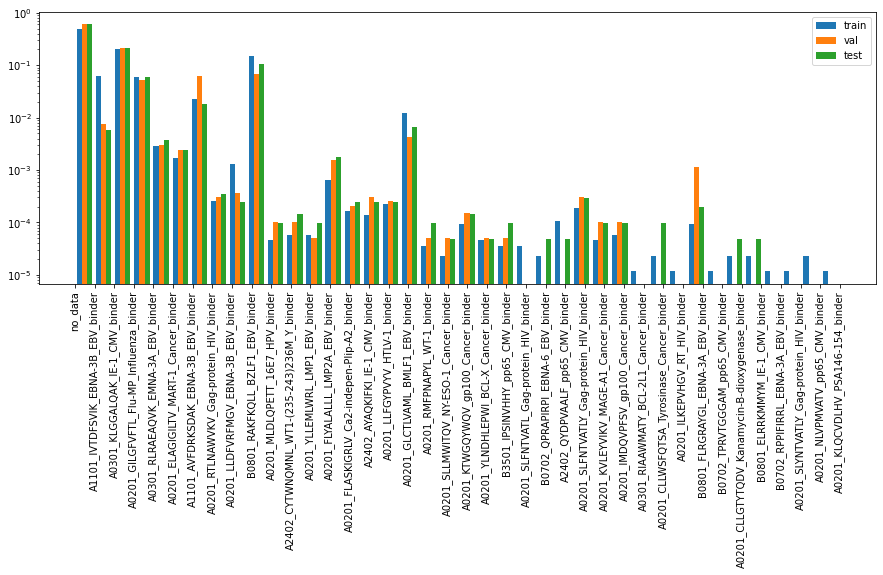

In [48]:
plt.figure(figsize=(15,5))
plt.hist([train['binding_name'], val['binding_name'], test['binding_name']], density=True, bins=len(train['binding_name'].unique()), label=['train', 'val', 'test'])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.show()

#### Linear y-scale

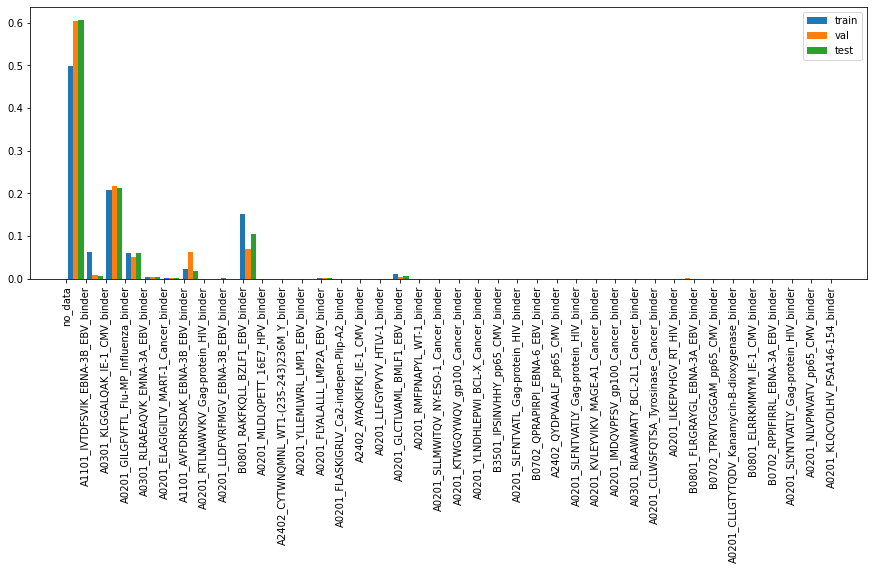

In [49]:
plt.figure(figsize=(15,5))
plt.hist([train['binding_name'], val['binding_name'], test['binding_name']], density=True, bins=len(train['binding_name'].unique()), label=['train', 'val', 'test'])
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.show()

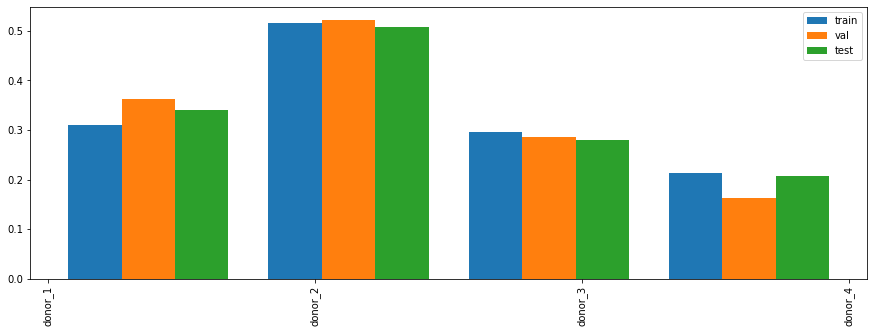

In [50]:
plt.figure(figsize=(15,5))
plt.hist([train['donor'], val['donor'], test['donor']], density=True, bins=len(train['donor'].unique()), label=['train', 'val', 'test'])
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.show()

#### Check if clonotypes are unique within each set

In [51]:
form_train = set(train['clonotype'].tolist())
form_val = set(val['clonotype'].tolist())
form_test = set(test['clonotype'].tolist())

print('Intersection in clonotypes between two sets should be empty\n')
print('Intersection in clonotypes between train and test: ', form_train.intersection(form_test))
print('Intersection in clonotypes between train and val: ', form_train.intersection(form_val))
print('Intersection in clonotypes between val and test: ', form_val.intersection(form_test))
# print('\nSanity Check - Intersection in clonotypes between train and train: ', form_train.intersection(form_train))

Intersection in clonotypes between two sets should be empty

Intersection in clonotypes between train and test:  set()
Intersection in clonotypes between train and val:  set()
Intersection in clonotypes between val and test:  set()


### Save splits into column 'set'

In [52]:
adata.obs.loc[train.index, 'set'] = 'train'
adata.obs.loc[val.index, 'set'] = 'val'
adata.obs.loc[test.index, 'set'] = 'test'
adata.obs['set'].value_counts()

train    87642
test     20958
val      19987
Name: set, dtype: int64

In [53]:
adata.obs['set'].sample(20)

CGTAGCGGTTCAGGCC-29-donor_2    train
CAAGTTGTCTAACTTC-12-donor_3    train
CATATGGCAGTATAAG-27-donor_2    train
CTAGCCTGTCGAGTTT-8-donor_2      test
GATGAGGTCATCGATG-1-donor_1     train
CAGTCCTCAATCGAAA-18-donor_2    train
TACTTGTTCCAAACAC-40-donor_1     test
TCAGGTATCAACACGT-39-donor_2    train
GCGAGAACAGTCAGAG-39-donor_1    train
TCGTAGAAGCGCCTCA-11-donor_1      val
ATTCTACTCTTGCAAG-12-donor_3    train
CTGCGGACAGGTCCAC-21-donor_1     test
CGTCTACTCAAAGACA-3-donor_4      test
GCGAGAATCTCGCATC-2-donor_4       val
ACATCAGCACGGCCAT-33-donor_2    train
ACGCAGCAGGATATAC-8-donor_4     train
CAGCATAGTTGACGTT-13-donor_2      val
ACATACGCACCAGGCT-39-donor_2    train
GTACGTATCTAGCACA-3-donor_4     train
CACACCTCATAGAAAC-40-donor_1     test
Name: set, dtype: object

# Save data file

In [54]:
# TODO Store tcr_seq and one_hot as object, not as categorical
adata.write_h5ad('../data/10x_CD8TC/v5_train_val_test.h5ad', compression='gzip')

... storing 'TRA+TRB' as categorical
... storing 'one_hot' as categorical
... storing 'tcr_seq' as categorical
... storing 'binding_name' as categorical
... storing 'donor+binding' as categorical
... storing 'set' as categorical
